
0: 960x1280 1 chest, 1 face, 1 nostril, 54.4ms
Speed: 18.7ms preprocess, 54.4ms inference, 182.6ms postprocess per image at shape (1, 3, 960, 1280)
Frame 0: Mean Pixel Value = 210.52619047619046

0: 960x1280 1 chest, 1 face, 1 nostril, 22.6ms
Speed: 11.7ms preprocess, 22.6ms inference, 2.4ms postprocess per image at shape (1, 3, 960, 1280)
Frame 1: Mean Pixel Value = 211.9047619047619

0: 960x1280 1 chest, 1 face, 1 nostril, 22.6ms
Speed: 13.9ms preprocess, 22.6ms inference, 4.0ms postprocess per image at shape (1, 3, 960, 1280)
Frame 2: Mean Pixel Value = 210.5948717948718

0: 960x1280 1 chest, 1 face, 1 nostril, 22.2ms
Speed: 13.9ms preprocess, 22.2ms inference, 2.4ms postprocess per image at shape (1, 3, 960, 1280)
Frame 3: Mean Pixel Value = 211.5151515151515

0: 960x1280 1 chest, 1 face, 1 nostril, 20.8ms
Speed: 9.9ms preprocess, 20.8ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 1280)
Frame 4: Mean Pixel Value = 209.76969696969698

0: 960x1280 1 chest, 1 face, 1 

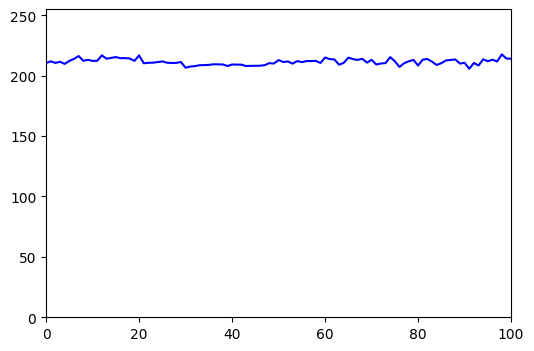

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO

# Load your custom YOLO model
model_path = r"E:\IITGN\mean_of_pixels\best.pt"
model = YOLO(model_path)

# Load the video
video_path = r"E:\IITGN\mean_of_pixels\thermal_rec_2024-08-08_18-51-05 (2).avi"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Output video writer
out = cv2.VideoWriter("output_video.avi", cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# Data storage
frame_numbers = []
mean_values = []

# Plot setup
plt.ion()
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 100)
ax.set_ylim(0, 255)
line, = ax.plot([], [], 'b-')  # Initialize an empty line plot

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model
    results = model(frame)

    mean_val = None  # Reset mean for each frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            conf = float(box.conf[0])  # Confidence score
            class_id = int(box.cls[0])  # Class ID
            class_name = model.names[class_id]  # Class name

            # Only process the "nostril" class
            if class_name == "nostril" and conf > 0.5:
                roi = frame[y1:y2, x1:x2]  # Extract nostril region
                mean_val = np.mean(roi)  # Compute mean pixel value

                # Draw bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"Nostril {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Store values if detection was made
    if mean_val is not None:
        frame_numbers.append(frame_count)
        mean_values.append(mean_val)
        print(f"Frame {frame_count}: Mean Pixel Value = {mean_val}")

    frame_count += 1

    # Update plot in real-time
    if len(frame_numbers) > 0:
        line.set_xdata(frame_numbers)
        line.set_ydata(mean_values)
        ax.relim()
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()

    # Show video with bounding boxes
    cv2.imshow("YOLOv8 Detection", frame)
    out.write(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save data to CSV
df = pd.DataFrame({"Frame": frame_numbers, "Mean_Pixel_Value": mean_values})
df.to_csv("mean_pixel_values_ayush_bhaiya_data.csv", index=False)

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()


calculation of mean with zero if no detection of ROI

In [ ]:

# import cv2
# import numpy as np
# import pandas as pd
# from ultralytics import YOLO

# # Load your custom YOLO model
# model_path = r"E:\IITGN\mean_of_pixels\best.pt"
# model = YOLO(model_path)

# # Load the video
# video_path = r"E:\IITGN\mean_of_pixels\Gajendra_2025-02-16_15-03-39.avi"
# cap = cv2.VideoCapture(video_path)

# # Get video properties
# frame_width = int(cap.get(3))
# frame_height = int(cap.get(4))
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# # Output video writer
# out = cv2.VideoWriter("output_video.avi", cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

# # Data storage
# frame_numbers = []
# mean_values = []

# frame_count = 0

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Run YOLO model
#     results = model(frame)

#     mean_val = 0  # Default value if no ROI is detected

#     for r in results:
#         for box in r.boxes:
#             x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
#             conf = float(box.conf[0])  # Confidence score
#             class_id = int(box.cls[0])  # Class ID
#             class_name = model.names[class_id]  # Class name

#             # Process only "nostril" detections with confidence > 0.5
#             if class_name == "nostril" and conf > 0.5:
#                 roi = frame[y1:y2, x1:x2]  # Extract nostril region
#                 mean_val = np.mean(roi)  # Compute mean pixel value

#                 # Draw bounding box and label
#                 cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#                 cv2.putText(frame, f"Nostril {conf:.2f}", (x1, y1 - 10),
#                             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#     # Store values (default is 0 if no nostril detected)
#     frame_numbers.append(frame_count)
#     mean_values.append(mean_val)
#     print(f"Frame {frame_count}: Mean Pixel Value = {mean_val}")

#     frame_count += 1

#     # Show video with bounding boxes
#     cv2.imshow("YOLOv8 Detection", frame)
#     out.write(frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Save data to CSV
# df = pd.DataFrame({"Frame": frame_numbers, "Mean_Pixel_Value": mean_values})
# df.to_csv("mean_pixel_values.csv", index=False)

# # Cleanup
# cap.release()
# out.release()
# cv2.destroyAllWindows()

# print("Processing complete! Mean values saved to 'mean_pixel_values.csv'.")


ploting the graph frames vs mean 

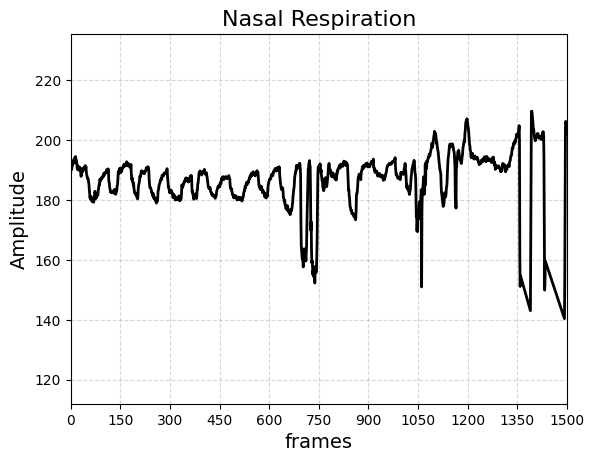

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = "mean_pixel_values.csv"
df = pd.read_csv(csv_path)
fps = 25
# Convert frame numbers to time (in seconds)
# df["/Time (s)"] = df["Frame"] / fps
# print(df["Frame"])
# print(df["Time (s)"])

# Plot the nasal respiration waveform
#plt.figure(figsize=(10, 4))
#plt.plot(df["Time (s)"], df["Mean_Pixel_Value"], color="black", linewidth=2)
plt.plot(df["Frame"], df["Mean_Pixel_Value"], color="black", linewidth=2)

plt.xlabel("frames", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Nasal Respiration", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim([0,1500])
plt.xticks(np.arange(0, 1501, step=150))
plt.show()


savitzky_goloy_filter

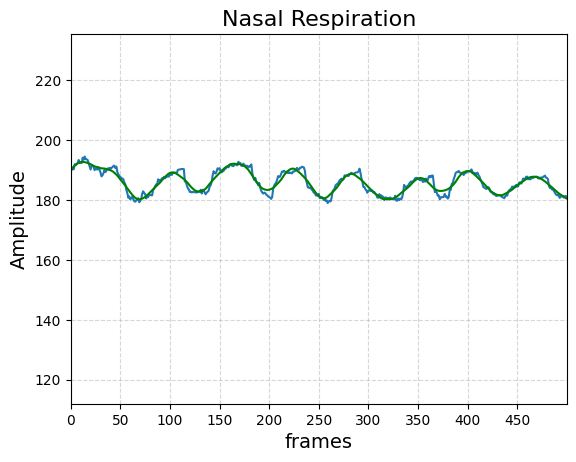

In [46]:
import numpy as np
from scipy.signal import savgol_filter
import signal
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd

csv_path = "mean_pixel_values.csv"
df = pd.read_csv(csv_path)
x=df["Frame"]
y=df["Mean_Pixel_Value"]
y_filtered=savgol_filter(y,49,3)
fig=plt.figure()
ax= fig.subplots()
p=ax.plot(x,y)
p=ax.plot(x,y_filtered,'g')
    

plt.xlabel("frames", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Nasal Respiration", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim([0,500])
plt.xticks(np.arange(0, 500, step=50))
plt.show()

what types of images we using

In [ ]:
import cv2
image=cv2.imread(r"E:\IITGN\mean_of_pixels\01_frame_0.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image)
print(image.shape)
#print(gray)
#print(gray.shape)


showing all type of filter

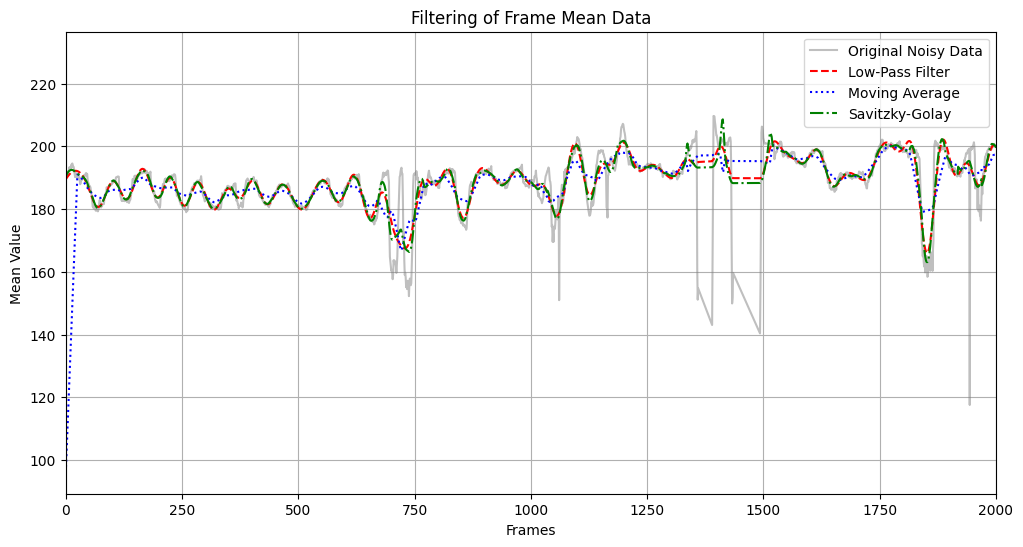

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter

# Generate Example Data (Replace this with your actual data)
frames =df["Frame"]
mean_values = df["Mean_Pixel_Value"]

# 1️⃣ Low-Pass Butterworth Filter
def lowpass_filter(data, cutoff=0.05, fs=1.0, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

low_passed = lowpass_filter(mean_values, cutoff=0.02)

# 2️⃣ Moving Average Filter
window_size = 50  # Adjust this value as needed
moving_avg = np.convolve(mean_values, np.ones(window_size)/window_size, mode='same')

# 3️⃣ Savitzky-Golay Filter (Polynomial smoothing)
savgol_filtered = savgol_filter(mean_values, window_length=51, polyorder=3)  # 51 points, 3rd-degree polynomial

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(frames, mean_values, alpha=0.5, label="Original Noisy Data", color="gray")
plt.plot(frames, low_passed, label="Low-Pass Filter", linestyle='dashed', color="red")
plt.plot(frames, moving_avg, label="Moving Average", linestyle='dotted', color="blue")
plt.plot(frames, savgol_filtered, label="Savitzky-Golay", linestyle='dashdot', color="green")

plt.legend()
plt.title("Filtering of Frame Mean Data")
plt.xlabel("Frames")
plt.ylabel("Mean Value")
plt.grid()
plt.xlim([0,2000])
plt.show()


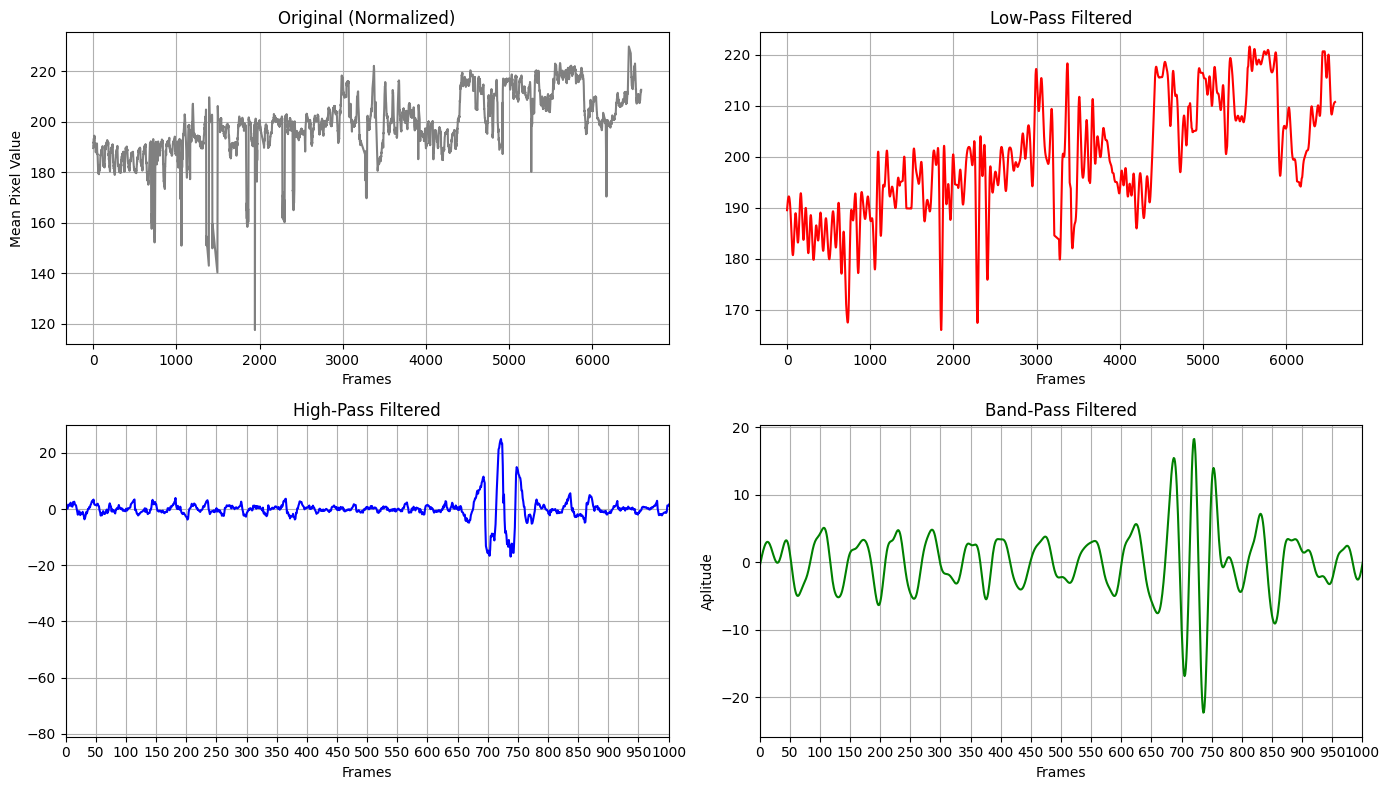

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt

# # Load the CSV file
# file_path = r"E:\IITGN\mean_of_pixels\mean_pixel_values.csv"
# df = pd.read_csv(file_path)

# # Extract data
# frames = df["Frame"].values
# mean_values = df["Mean_Pixel_Value"].values

# # Normalize data (Shift to zero mean)
# #normalized_values = mean_values - np.mean(mean_values)

# # Define Butterworth filters
# def butter_filter(data, cutoff, fs=1.0, order=5, filter_type='low'):
#     nyq = 0.5 * fs  # Nyquist frequency
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
#     return filtfilt(b, a, data)

# # Define Band-Pass filter separately
# def butter_bandpass_filter(data, lowcut, highcut, fs=1.0, order=5):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band', analog=False)
#     return filtfilt(b, a, data)

# # Apply Filters
# low_passed = butter_filter(mean_values, cutoff=0.02, filter_type='low')
# high_passed = butter_filter(mean_values, cutoff=0.02, filter_type='high')
# band_passed = butter_bandpass_filter(mean_values, lowcut=0.01, highcut=0.05)

# # Plot Original vs Filtered Data
# plt.figure(figsize=(14, 8))

# plt.subplot(2, 2, 1)
# plt.plot(frames, mean_values, label="Normalized Data", color="gray")
# plt.title("Original (Normalized)")
# plt.xlabel("Frames")
# plt.ylabel("Mean Pixel Value")
# #plt.xlim([0,100])
# #plt.xticks(np.arange(0, 1001, step=50))
# plt.grid()

# plt.subplot(2, 2, 2)
# plt.plot(frames, low_passed, label="Low-Pass Filter", color="red")
# plt.title("Low-Pass Filtered")
# plt.xlabel("Frames")
# plt.grid()

# plt.subplot(2, 2, 3)
# plt.plot(frames, high_passed, label="High-Pass Filter", color="blue")
# plt.title("High-Pass Filtered")
# plt.xlabel("Frames")
# plt.xlim([0,100])
# plt.xticks(np.arange(0, 1001, step=50))
# plt.grid()

# plt.subplot(2, 2, 4)
# plt.plot(frames, band_passed, label="Band-Pass Filter", color="green")
# plt.title("Band-Pass Filtered")
# plt.xlabel("Frames")
# plt.ylabel("Aplitude")
# plt.grid()
# plt.xlim([0,100])
# plt.xticks(np.arange(0, 1001, step=50))

# plt.tight_layout()
# plt.show()


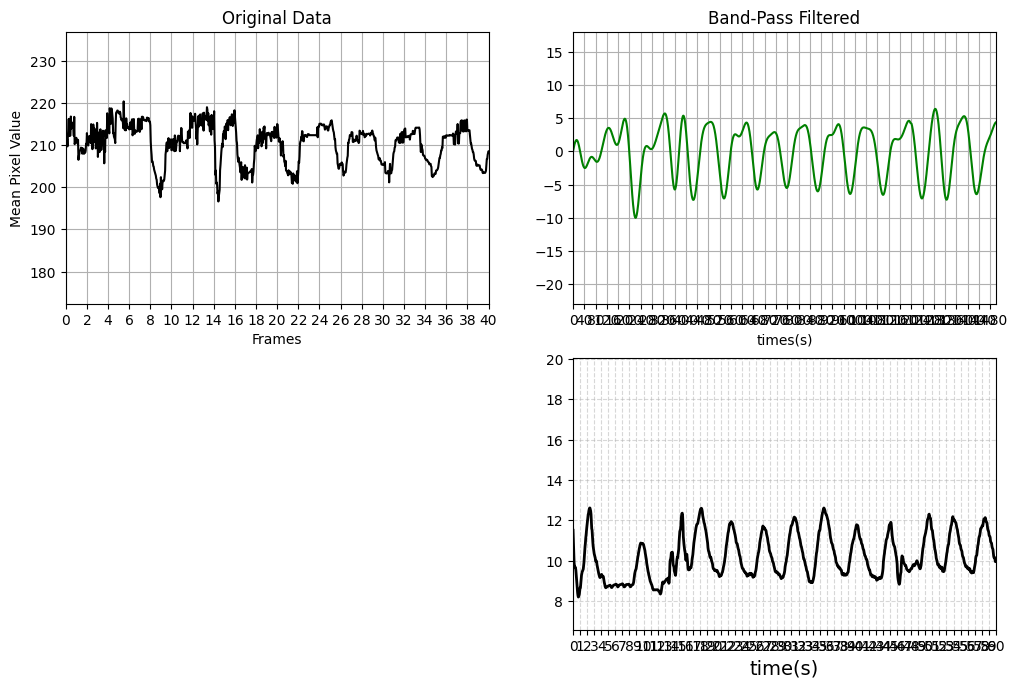

<Figure size 640x480 with 0 Axes>

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt, savgol_filter

# # Load the CSV file
# file_path = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
# df = pd.read_csv(file_path)

# csv_path =r"E:\IITGN\mean_of_pixels\Untitled spreadsheet - Sheet1.csv"
# dff = pd.read_csv(csv_path)

# # Extract data
# frames = df["Frame"].values
# mean_values = df["Mean_Pixel_Value"].values

# # Define Butterworth filters
# def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
#     nyq = 0.5 * fs  # Nyquist frequency
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype=filter_type)
#     return filtfilt(b, a, data)

# # Define Band-Pass filter separately
# def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='bandpass')
#     return filtfilt(b, a, data)

# # Apply Filters
# low_passed = butter_filter(mean_values, cutoff=0.5, filter_type='low')
# high_passed = butter_filter(mean_values, cutoff=0.1, filter_type='high')
# band_passed = butter_bandpass_filter(mean_values, lowcut=0.1, highcut=0.5)

# # Apply Savitzky-Golay Filter for smoothing
# savgol_filtered = savgol_filter(mean_values, window_length=21, polyorder=2)

# # Plot Original vs Filtered Data
# plt.figure(figsize=(12, 12))

# plt.subplot(3, 2, 1)
# plt.plot(frames, mean_values, label="Original Data", color="black")
# plt.title("Original Data")
# plt.xlabel("Frames")
# plt.ylabel("Mean Pixel Value")
# plt.xlim([0,1000])
# #plt.xticks(np.arange(0, 1001, step=50))
# plt.xticks(np.arange(0, 1001, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.grid()

# # plt.subplot(3, 2, 2)
# # plt.plot(frames, low_passed, label="Low-Pass Filter", color="red")
# # plt.title("Low-Pass Filtered")
# # plt.xlabel("Frames")
# # plt.xlim([0,1000])
# # plt.xticks(np.arange(0, 1001, step=50))
# # plt.grid()

# # plt.subplot(3, 2, 3)
# # plt.plot(frames, high_passed, label="High-Pass Filter", color="blue")
# # plt.title("High-Pass Filtered")
# # plt.xlabel("Frames")
# # plt.xlim([0,1000])
# # plt.xticks(np.arange(0, 1001, step=50))
# # plt.grid()

# plt.subplot(3, 2, 2)
# plt.plot(frames, band_passed, label="Band-Pass Filter", color="green")
# plt.title("Band-Pass Filtered")
# plt.xlabel("times(s)")
# plt.xlim([0, 1500])
# #plt.xticks(np.arange(0, 1501, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.xticks(np.arange(0, 1501, step=40))
# plt.grid()

# # plt.subplot(3, 2, 5)
# # plt.plot(frames, savgol_filtered, label="Savitzky-Golay Filter", color="purple")
# # plt.title("Savitzky-Golay Smoothed")
# # plt.xlabel("Frames")
# # plt.xlim([0,1000])
# # plt.xticks(np.arange(0, 1001, step=50))
# # plt.grid()


# plt.subplot(3,2,4)
# plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
# plt.xlabel("time(s)", fontsize=14)
# #plt.ylabel("Amplitude", fontsize=14)
# #plt.title("Nasal Respiration", fontsize=16)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.xlim([0,60])
# plt.xticks(np.arange(0,61, step=1))
# plt.show()

# plt.tight_layout()
# plt.show()


In [ ]:

# plt.plot(frames, band_passed, label="Band-Pass Filter", color="green")
# plt.title("Band-Pass Filtered")
# plt.xlabel("times(s)")
# plt.xlim([0, 1500])
# #plt.xticks(np.arange(0, 1501, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# # plt.xticks(np.arange(0, 1501, step=40))
# plt.grid()


# plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
# plt.xlabel("time(s)", fontsize=14)
# #plt.ylabel("Amplitude", fontsize=14)
# #plt.title("Nasal Respiration", fontsize=16)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.xlim([0,60])
# # plt.xticks(np.arange(0,61, step=1))
# plt.show()

# plt.tight_layout()
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# csv_path =r"E:\IITGN\mean_of_pixels\processed_chest_resp.csv"
# dff = pd.read_csv(csv_path)

# # dff.set_index('Time(s)', inplace=True)  # Set 'Time' as the index   dff["Time(s)"], dff["Force(N)"]

# # new_index = np.arange(0, dff.index[-1], 0.04)  # Create a new time index with intervals of 0.04

# # dff = dff.reindex(new_index).interpolate(method='linear') 

# # print(dff.head())
# # # dff.to_csv('processed_chest_resp.csv')


# plt.figure(figsize=(10, 4))
# plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
# plt.xlabel("time(s)", fontsize=14)
# plt.ylabel("Amplitude", fontsize=14)
# plt.title("Nasal Respiration", fontsize=16)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.xlim([0,40])
# plt.xticks(np.arange(0,41, step=2))
# plt.show()


plot the  result by normal data without resample


(14083,)
(14083,)
(11438,)
(11438,)


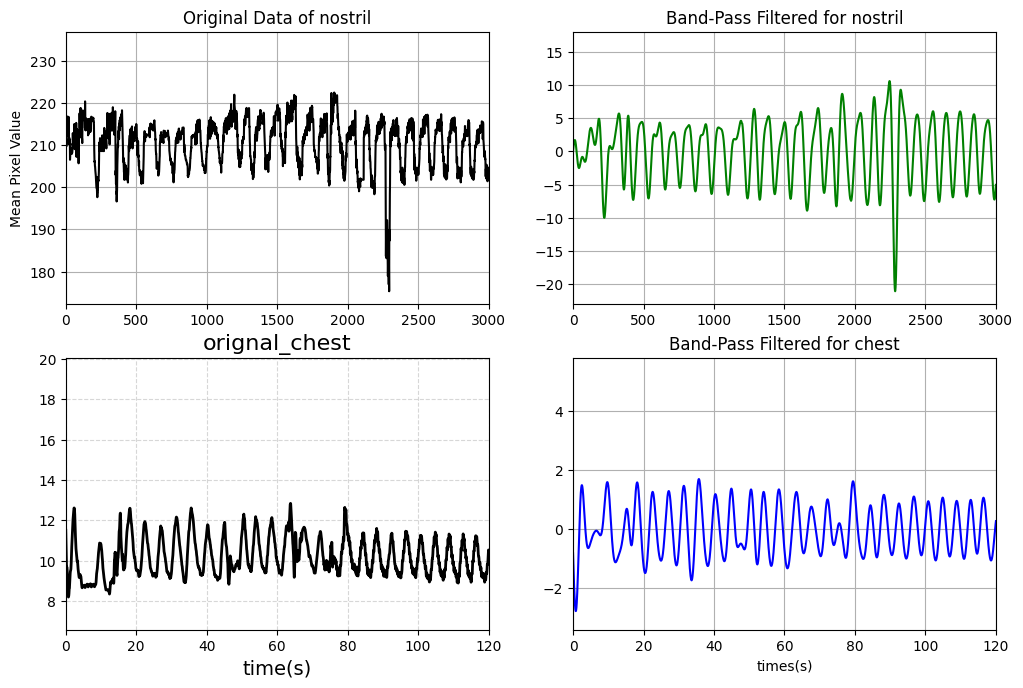

<Figure size 640x480 with 0 Axes>

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt, savgol_filter

# # Load the CSV file
# file_path = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
# df = pd.read_csv(file_path)

# csv_path =r"E:\IITGN\mean_of_pixels\Untitled spreadsheet - Sheet1.csv"
# dff = pd.read_csv(csv_path)

# # Extract data
# frames = df["Frame"].values
# print(frames.shape)
# mean_values = df["Mean_Pixel_Value"].values
# print(mean_values.shape)

# # Define Butterworth filters
# def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
#     nyq = 0.5 * fs  # Nyquist frequency
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype=filter_type)
#     return filtfilt(b, a, data)

# # Define Band-Pass filter separately
# def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='bandpass')
#     return filtfilt(b, a, data)

# # Apply Filters
# low_passed = butter_filter(mean_values, cutoff=0.5, filter_type='low')
# high_passed = butter_filter(mean_values, cutoff=0.1, filter_type='high')
# band_passed = butter_bandpass_filter(mean_values, lowcut=0.1, highcut=0.5)


# # Apply Savitzky-Golay Filter for smoothing
# # savgol_filtered = savgol_filter(mean_values, window_length=21, polyorder=2)

# # Plot Original vs Filtered Data
# plt.figure(figsize=(12, 12))

# plt.subplot(3, 2, 1)
# plt.plot(frames, mean_values, label="Original Data of nostril", color="black")
# plt.title("Original Data of nostril")
# # plt.xlabel("Frames")
# plt.ylabel("Mean Pixel Value")
# plt.xlim([0,3000])
# #plt.xticks(np.arange(0, 1001, step=50))
# # plt.xticks(np.arange(0, 1501, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.grid()


# plt.subplot(3, 2, 2)
# plt.plot(frames, band_passed, label="Band-Pass Filter_nostril", color="green")
# plt.title("Band-Pass Filtered for nostril")
# # plt.xlabel("times(s)")
# plt.xlim([0, 3000])
# # num_ticks = len(np.arange(0, 14083, step=42))  # Get the number of tick positions
# # print(num_ticks)
# # plt.xticks(np.arange////(0, 14083, step=42), labels=np.arange(0, 2,num_ticks))
# # plt.xticks(np.arange(0, 3001, step=200))
# plt.grid()



# #########################################################################################################################################

# # Extract data
# frames_1 = dff["Time(s)"].values
# print(frames_1.shape)
# mean_values_1 = dff["Force(N)"].values
# print(mean_values_1.shape)

# # Define Butterworth filters
# def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
#     nyq = 0.5 * fs  # Nyquist frequency
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype=filter_type)
#     return filtfilt(b, a, data)

# # Define Band-Pass filter separately
# def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='bandpass')
#     return filtfilt(b, a, data)

# # Apply Filters
# low_passed_1 = butter_filter(mean_values_1, cutoff=0.5, filter_type='low')
# high_passed_1 = butter_filter(mean_values_1, cutoff=0.1, filter_type='high')
# band_passed_1 = butter_bandpass_filter(mean_values_1, lowcut=0.1, highcut=0.5)
# #graph
# plt.subplot(3,2,3)
# plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
# plt.xlabel("time(s)", fontsize=14)
# #plt.ylabel("Amplitude", fontsize=14)
# plt.title("orignal_chest", fontsize=16)
# plt.grid(True, linestyle="--", alpha=0.5)
# plt.xlim([0,120])
# # plt.xticks(np.arange(0,121, step=1))




# plt.subplot(3,2,4)
# plt.plot(frames_1, band_passed_1, label="Band-Pass Filter_for chest", color="blue")
# plt.title("Band-Pass Filtered for chest")
# plt.xlabel("times(s)")
# plt.xlim([0, 120])
# # plt.xticks(np.arange(0,11430, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# # plt.xticks(np.arange(0,121, step=10))
# plt.grid()
# plt.show()
# plt.tight_layout()





in this code i plot the new chest csv file (resampled )

(14083,)
(14083,)
(14296,)
(14296,)


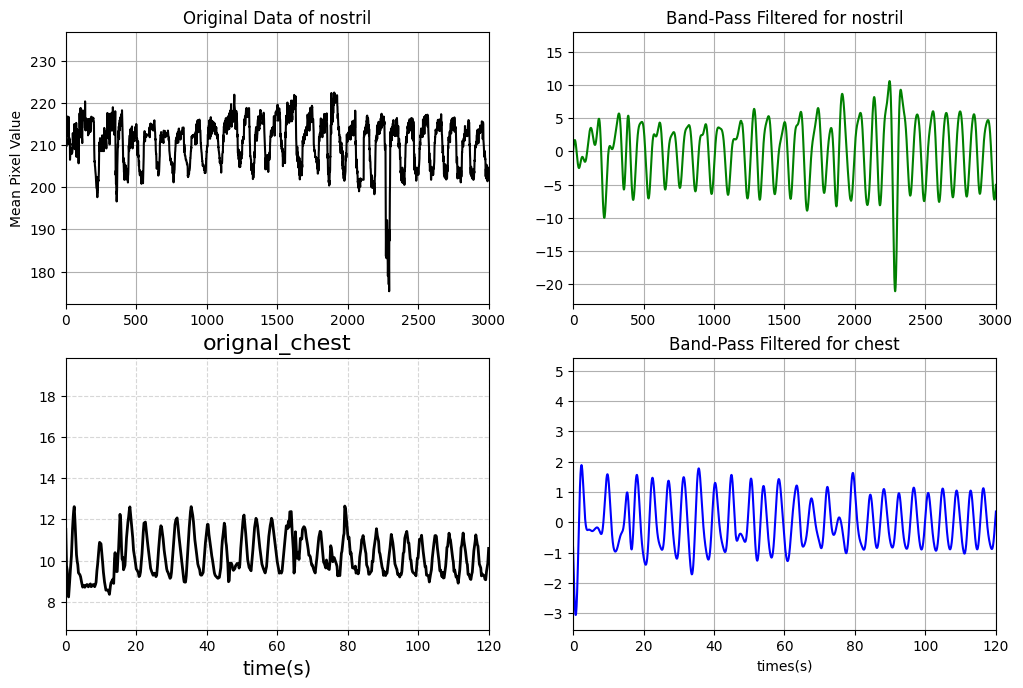

<Figure size 640x480 with 0 Axes>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter

# Load the CSV file
file_path = r"E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv"
df = pd.read_csv(file_path)

csv_path =r"E:\IITGN\mean_of_pixels\processed_chest_resp.csv"
dff = pd.read_csv(csv_path)

# Extract data
frames = df["Frame"].values
print(frames.shape)
mean_values = df["Mean_Pixel_Value"].values
print(mean_values.shape)

# Define Butterworth filters
def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=filter_type)
    return filtfilt(b, a, data)

# Define Band-Pass filter separately
def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return filtfilt(b, a, data)

# Apply Filters
low_passed = butter_filter(mean_values, cutoff=0.5, filter_type='low')
high_passed = butter_filter(mean_values, cutoff=0.1, filter_type='high')
band_passed = butter_bandpass_filter(mean_values, lowcut=0.1, highcut=0.5)


# Apply Savitzky-Golay Filter for smoothing
# savgol_filtered = savgol_filter(mean_values, window_length=21, polyorder=2)

# Plot Original vs Filtered Data
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(frames, mean_values, label="Original Data of nostril", color="black")
plt.title("Original Data of nostril")
# plt.xlabel("Frames")
plt.ylabel("Mean Pixel Value")
plt.xlim([0,3000])
#plt.xticks(np.arange(0, 1001, step=50))
# plt.xticks(np.arange(0, 1501, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
plt.grid()


plt.subplot(3, 2, 2)
plt.plot(frames, band_passed, label="Band-Pass Filter_nostril", color="green")
plt.title("Band-Pass Filtered for nostril")
# plt.xlabel("times(s)")
plt.xlim([0, 3000])
# num_ticks = len(np.arange(0, 14083, step=42))  # Get the number of tick positions
# print(num_ticks)
# plt.xticks(np.arange////(0, 14083, step=42), labels=np.arange(0, 2,num_ticks))
# plt.xticks(np.arange(0, 3001, step=200))
plt.grid()



#########################################################################################################################################

# Extract data
frames_1 = dff["Time(s)"].values
print(frames_1.shape)
mean_values_1 = dff["Force(N)"].values
print(mean_values_1.shape)

# Define Butterworth filters
def butter_filter(data, cutoff, fs=25, order=5, filter_type='low'):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=filter_type)
    return filtfilt(b, a, data)

# Define Band-Pass filter separately
def butter_bandpass_filter(data, lowcut, highcut, fs=25, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return filtfilt(b, a, data)

# Apply Filters
low_passed_1 = butter_filter(mean_values_1, cutoff=0.5, filter_type='low')
high_passed_1 = butter_filter(mean_values_1, cutoff=0.1, filter_type='high')
band_passed_1 = butter_bandpass_filter(mean_values_1, lowcut=0.1, highcut=0.5)
#graph
plt.subplot(3,2,3)
plt.plot(dff["Time(s)"], dff["Force(N)"], color="black", linewidth=2)
plt.xlabel("time(s)", fontsize=14)
#plt.ylabel("Amplitude", fontsize=14)
plt.title("orignal_chest", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim([0,120])
# plt.xticks(np.arange(0,121, step=1))




plt.subplot(3,2,4)
plt.plot(frames_1, band_passed_1, label="Band-Pass Filter_for chest", color="blue")
plt.title("Band-Pass Filtered for chest")
plt.xlabel("times(s)")
plt.xlim([0, 120])
# plt.xticks(np.arange(0,11430, step=50), labels=np.arange(0, 2 + 20 * 2, step=2))
# plt.xticks(np.arange(0,121, step=10))
plt.grid()
plt.show()
plt.tight_layout()





In [30]:
frames/25

array([0.0000e+00, 4.0000e-02, 8.0000e-02, ..., 5.6344e+02, 5.6348e+02,
       5.6352e+02])

In [31]:
frames_1

array([0.0000e+00, 4.0000e-02, 8.0000e-02, ..., 5.7172e+02, 5.7176e+02,
       5.7180e+02])

In [32]:
band_passed_1

array([-0.83052277, -1.01450973, -1.19738014, ..., -0.10087096,
       -0.08916015, -0.07816063])

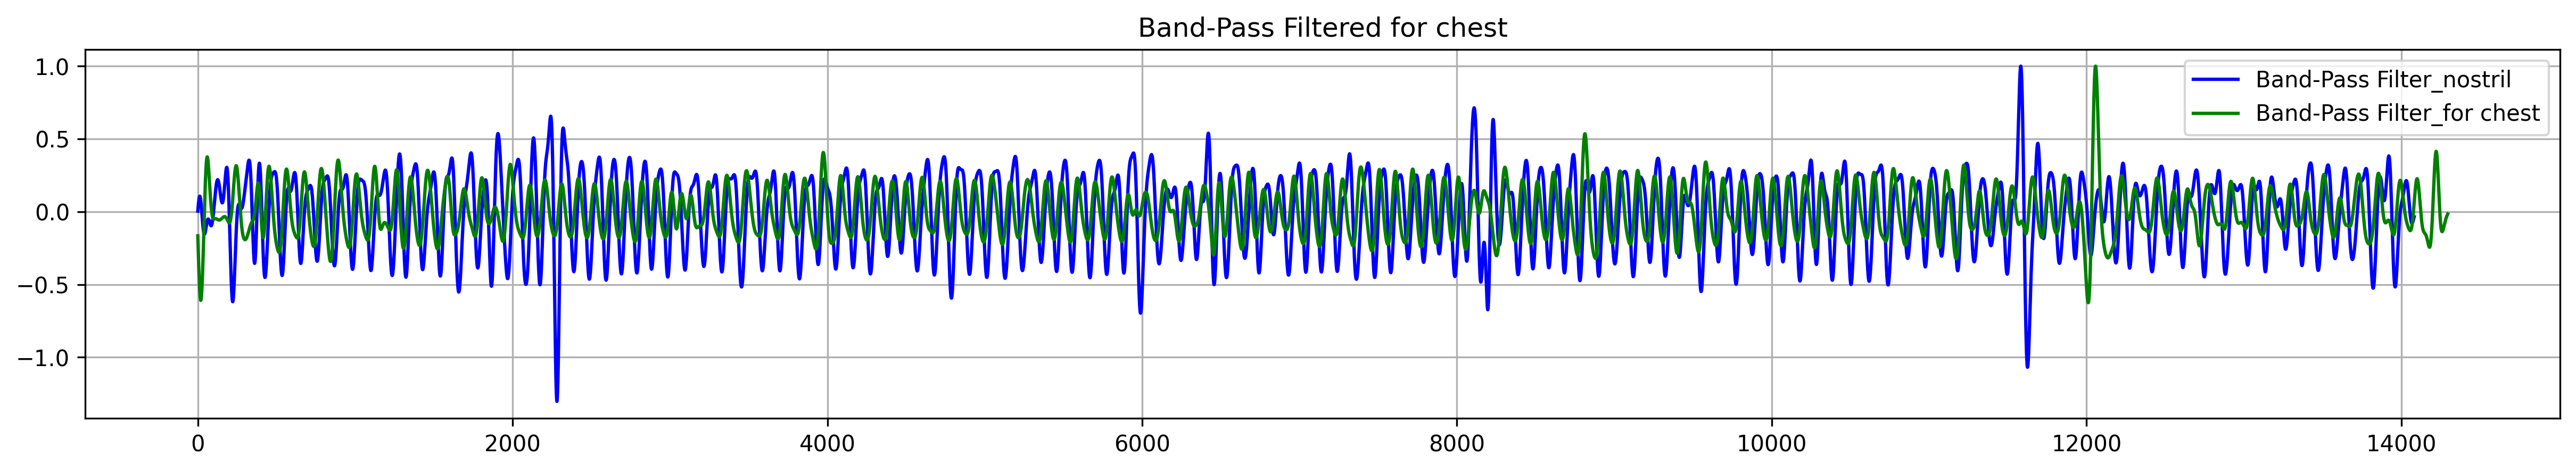

In [43]:
plt.figure(figsize=(20,3),dpi=300)
plt.plot(band_passed/max(band_passed), label="Band-Pass Filter_nostril", color="blue")
# plt.show()

plt.plot(band_passed_1/max(band_passed_1), label="Band-Pass Filter_for chest", color="green")
plt.title("Band-Pass Filtered for chest")
plt.grid(True)
plt.legend()
# plt.xlim([0,4000])
plt.show()

in this i just plot the new resampling csv file (only for comprestion b/w nostril signal and chest signal)

len of nostril data point 14083
len of chest data point 14296
14083
14296


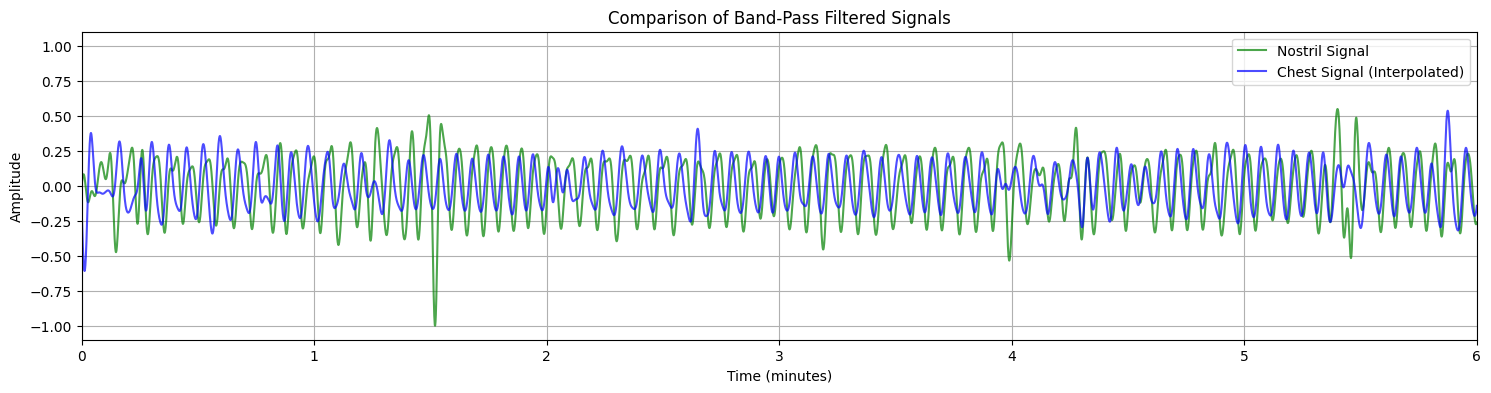

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Convert frames to time (assuming uniform sampling)

print("len of nostril data point",len(frames))
print("len of chest data point",len(frames_1))

time_nostril = np.linspace(0, 9.38, len(frames)) # Convert nostril frames to time
print(len(time_nostril))
time_chest = np.linspace(0, 9.53, len(frames_1))  # Convert chest frames to time
print(len(time_chest))

# Interpolate chest data to match nostril time scale
# interp_chest = interp1d(time_chest, band_passed_1, kind='linear', fill_value="extrapolate")
# band_passed_1_interp = interp_chest(time_nostril)

# Now plot both signals on the same time axis
plt.figure(figsize=(18, 4))
plt.plot(time_nostril, band_passed/max(np.abs(band_passed)), label="Nostril Signal", color='green', alpha=0.7)
plt.plot(time_chest, band_passed_1/max(np.abs(band_passed_1)), label="Chest Signal (Interpolated)", color='blue', alpha=0.7)
plt.title("Comparison of Band-Pass Filtered Signals")
plt.xlabel("Time (minutes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim([0,6])
plt.show()


in this i try to use resample library only to resample the smaller data point

14083


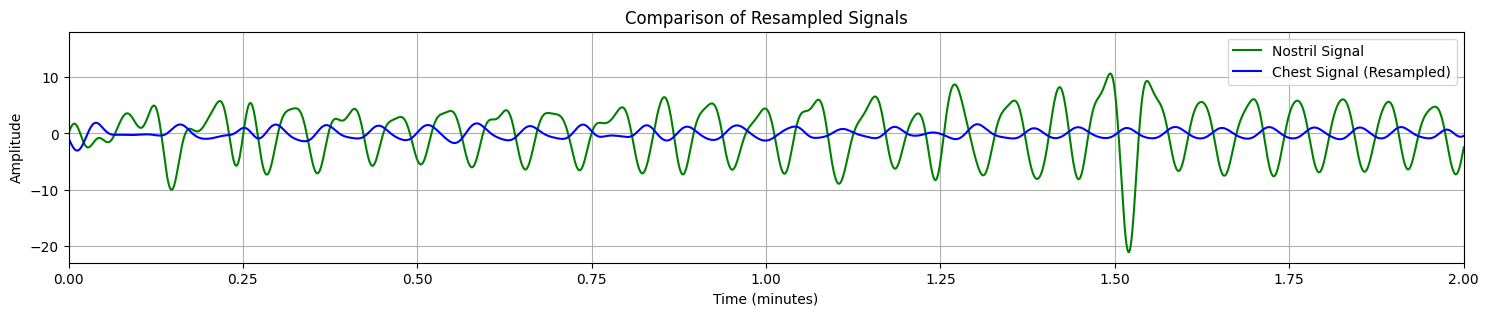

In [51]:
from scipy.signal import resample

# Define the target length (nostril's data points)
target_length = len(mean_values)

# Resample the chest signal to match nostril signal's length
band_passed_1_resampled = resample(band_passed_1, target_length)
print(len(band_passed_1_resampled))
# Plot the corrected signals
plt.figure(figsize=(18,3))
plt.plot(time_nostril, band_passed, label="Nostril Signal", color='green')

plt.plot(time_nostril, band_passed_1_resampled, label="Chest Signal (Resampled)", color='blue')

plt.title("Comparison of Resampled Signals")
plt.xlabel("Time (minutes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim([0, 2])
plt.show()


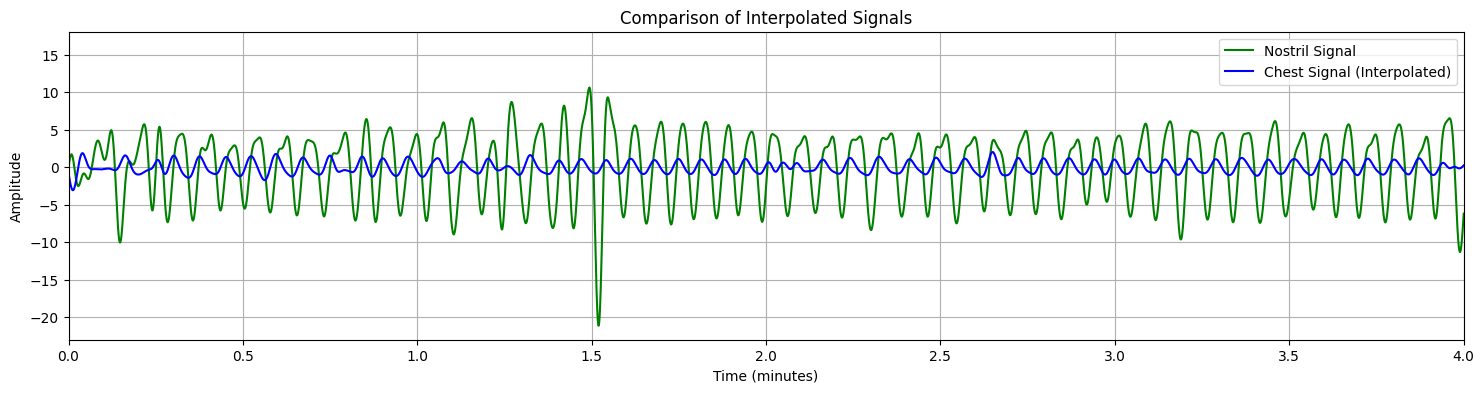

In [37]:
from scipy.interpolate import interp1d

# Interpolate chest signal to match nostril signal's time axis
interp_chest = interp1d(time_chest, band_passed_1, kind='linear', fill_value="extrapolate")
band_passed_1_interp = interp_chest(time_nostril)

# Plot the corrected signals
plt.figure(figsize=(18, 4))

plt.plot(time_nostril, band_passed, label="Nostril Signal", color='green')
plt.plot(time_nostril, band_passed_1_interp, label="Chest Signal (Interpolated)", color='blue')

plt.title("Comparison of Interpolated Signals")
plt.xlabel("Time (minutes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim([0, 4])
plt.show()


[ 0.46474505  1.09192378  1.8954619  ... -0.34606371 -0.1382749
 -0.02495608]
90
[-0.07654827 -0.11059826 -0.14024209 ...  0.05368187  0.00547226
 -0.03790592]


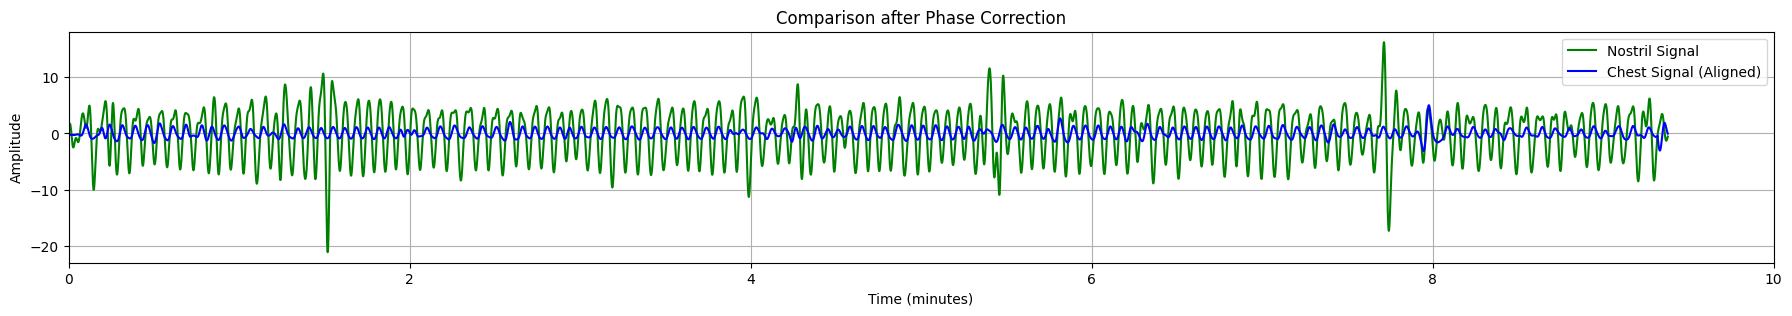

In [38]:
import numpy as np

# Compute cross-correlation to find the lag
corr = np.correlate(band_passed_1_interp - np.mean(band_passed_1_interp), 
                     band_passed - np.mean(band_passed), mode='full')
lag = np.argmax(corr) - (len(band_passed_1_interp) - 1)
print(corr)
print(lag)

# Shift the interpolated signal
time_shifted = np.roll(band_passed_1_interp, -lag)
print(time_shifted)

# Plot again
plt.figure(figsize=(22,3))
plt.plot(time_nostril, band_passed, label="Nostril Signal", color='green')
plt.plot(time_nostril, time_shifted, label="Chest Signal (Aligned)", color='blue')

plt.title("Comparison after Phase Correction")
plt.xlabel("Time (minutes)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.xlim([0, 10])
plt.show()


In [ ]:
import pandas as pd
import numpy as np

nostril=pd.read_csv(r'E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv')
chest=pd.read_csv(r'E:\IITGN\mean_of_pixels\processed_chest_resp.csv')
predicted=nostril['Mean_Pixel_Value'].values
ground_truth=chest['Force(N)'].values

y=ground_truth 
x=predicted

pred_min=min(x)
pred_max=max(x)
# print("the min of nostril data",min_value_nostril)
# print("the max of nostril data",max_value_nostril)

gt_min=min(y)
gt_max=max(y)
# print('min value of chest',min_value_chest)
# print('max value of chest',max_value_chest)

# Normalize ground truth
ground_truth_normalized = (ground_truth - gt_min) / (gt_max - gt_min)
print("ground_truth_normali data",ground_truth_normalized)
print(ground_truth_normalized.shape)

# Normalize predicted signal
predicted_normalized = (predicted - pred_min) / (pred_max - pred_min)
print("predicted_normalized data",predicted_normalized)


# Step 2: Define parameters
sampling_rate = 25  # in Hz (adjust if your data has a different sampling rate)
window_duration = 20  # in seconds
window_size = window_duration * sampling_rate  # Number of samples per window

# Step 3: Split into windows
num_samples = len(ground_truth)
ground_truth_windows = []
predicted_windows = []

for start in range(0, num_samples, window_size):
    end = start + window_size
    if end <= num_samples: 
        ground_truth_windows.append(ground_truth_normalized[start:end])
        predicted_windows.append(predicted_normalized[start:end])

# Convert lists to numpy arrays for easier manipulation later if needed
ground_truth_windows = np.array(ground_truth_windows)
print(ground_truth_windows)
predicted_windows = np.array(predicted_windows)
print("predicted",predicted_windows)

# Step 4: Calculate error metrics for each window
mae_per_window = []
rmse_per_window = []
r2_per_window=[]

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window)**2))# Root Mean Square Error (RMSE)
    #r^2
    y_mean = np.mean(gt_window)
    
    ss_res = np.sum((gt_window - pred_window)**2)  # Residual sum of squares
    ss_tot = np.sum((gt_window - y_mean)**2)
    print(ss_res/ss_tot)# Total sum of squares
    r_squared = 1 - (ss_res / ss_tot)
    
    
    
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)
    r2_per_window.append(r_squared)







# Step 5: Print results
print("MAE per window:", mae_per_window)
print("RMSE per window:", rmse_per_window)
print('r2 per window',r2_per_window)

#  Save results to a new CSV file
results_df = pd.DataFrame({
    'Window': range(1, len(mae_per_window) + 1),
    'MAE': mae_per_window,
    'RMSE': rmse_per_window,
    'r2':r2_per_window,
    
})
results_df.to_csv('error_metrics_by_window_r2.csv', index=False)


ground_truth_normali data [0.35629026 0.32699386 0.29769745 ... 0.13688715 0.13688715 0.13688715]
(14296,)
predicted_normalized data [0.59926291 0.62271896 0.6004315  ... 0.62123776 0.62035158 0.61487768]
[[0.35629026 0.32699386 0.29769745 ... 0.20823014 0.20413637 0.20004259]
 [0.19594882 0.19518123 0.19441364 ... 0.33157807 0.33654608 0.34151409]
 [0.3464821  0.35236687 0.35825164 ... 0.24226032 0.23727098 0.23228164]
 ...
 [0.20085322 0.20055462 0.20025601 ... 0.20678028 0.20750521 0.20823014]
 [0.20895507 0.20980798 0.21066088 ... 0.34950954 0.35347547 0.3574414 ]
 [0.36140732 0.36554375 0.36968018 ... 0.3293177  0.32771854 0.32611937]]
predicted [[0.59926291 0.62271896 0.6004315  ... 0.62675817 0.62172603 0.62817607]
 [0.67671294 0.67458609 0.65400401 ... 0.53531352 0.55222561 0.55923169]
 [0.566905   0.56428735 0.58199501 ... 0.7441099  0.73034797 0.73115423]
 ...
 [0.79865198 0.79998125 0.72749133 ... 0.70889756 0.73361191 0.74930329]
 [0.72011183 0.71382797 0.71170113 ... 0.675

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt


# signal1 = ground_truth_normalized  # Ground truth signal
# signal2 = predicted_normalized  # Predicted signal with lag and noise

# # Step 2: Compute cross-correlation
# cross_corr = np.correlate(signal1 - np.mean(signal1), signal2 - np.mean(signal2), mode='full')

# # Step 3: Find the lag corresponding to maximum correlation
# lags = np.arange(-len(signal1) + 1, len(signal1))
# max_lag = lags[np.argmax(cross_corr)]

# min_length = min(len(lags), len(cross_corr))
# lags = lags[:min_length]
# cross_corr = cross_corr[:min_length]



# # Step 4: Plot the cross-correlation function
# plt.figure(figsize=(10, 6))
# plt.plot(lags, cross_corr)
# plt.axvline(max_lag, color='red', linestyle='--', label=f'Max Lag: {max_lag}')
# plt.title("Cross-Correlation")
# plt.xlabel("Lag")
# plt.ylabel("Correlation")
# plt.legend()
# plt.show()

# print(f"Maximum correlation occurs at lag: {max_lag}")


In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score  # Import r2_score

# Load data
nostril = pd.read_csv(r'E:\IITGN\mean_of_pixels\mean_pixel_values_ayush_bhaiya_data.csv')
chest = pd.read_csv(r'E:\IITGN\mean_of_pixels\processed_chest_resp.csv')

predicted = band_passed
ground_truth = time_shifted

print("orgjnal_predicted",band_passed)
print("ground_truth",time_shifted)

# Normalize signals
ground_truth_normalized = (ground_truth - ground_truth.min()) / (ground_truth.max() - ground_truth.min())
print("ground_truth_normalised",ground_truth_normalized)
predicted_normalized = (predicted - predicted.min()) / (predicted.max() - predicted.min())
print("predicted_normalized",predicted_normalized)

# Define window parameters
sampling_rate = 25  # in Hz
window_duration = 20  # in seconds
window_size = window_duration * sampling_rate  # Number of samples per window

# Split into windows
num_samples = len(ground_truth_normalized)
ground_truth_windows = []
predicted_windows = []

for start in range(0, num_samples, window_size):
    end = start + window_size
    if end <= num_samples: 
        ground_truth_windows.append(ground_truth_normalized[start:end])
        predicted_windows.append(predicted_normalized[start:end])

# Convert lists to numpy arrays
ground_truth_windows = np.array(ground_truth_windows)
predicted_windows = np.array(predicted_windows)

# Calculate error metrics per window
mae_per_window = []
rmse_per_window = []
r2_per_window = []

for gt_window, pred_window in zip(ground_truth_windows, predicted_windows):
    mae = np.mean(np.abs(gt_window - pred_window))  # Mean Absolute Error (MAE)
    rmse = np.sqrt(np.mean((gt_window - pred_window) ** 2))  # Root Mean Square Error (RMSE)
    
    # Use scikit-learn's r2_score function
    r2 = r2_score(gt_window, pred_window)  
    
    mae_per_window.append(mae)
    rmse_per_window.append(rmse)
    r2_per_window.append(r2)

# Print results
print("MAE per window:", mae_per_window)
print("RMSE per window:", rmse_per_window)
print("R² per window:", r2_per_window)

# # Save results to CSV
# results_df = pd.DataFrame({
#     'Window': range(1, len(mae_per_window) + 1),
#     'MAE': mae_per_window,
#     'RMSE': rmse_per_window,
#     'R²': r2_per_window,
# })
# results_df.to_csv('error_metrics_by_window_r22.csv', index=False)


orgjnal_predicted [ 0.06314388  0.27853423  0.48828982 ... -0.70638519 -0.63320749
 -0.56174159]
ground_truth [-0.07654827 -0.11059826 -0.14024209 ...  0.05368187  0.00547226
 -0.03790592]
ground_truth_normalised [0.3750234  0.37084664 0.36721037 ... 0.39099813 0.38508448 0.37976348]
predicted_normalized [0.5674669  0.5732306  0.57884351 ... 0.54687483 0.54883301 0.55074539]
MAE per window: [0.19422724649080964, 0.18199364832206752, 0.18270410282424426, 0.17892676382450992, 0.20421480386134414, 0.18190993152885396, 0.18555957773498127, 0.18462022999620484, 0.18077184389636683, 0.17861326711424472, 0.18148514005684832, 0.17956584709282197, 0.18483357184888113, 0.1812236336213726, 0.18381978305968907, 0.18399486288562864, 0.18634058252710148, 0.1785090567864396, 0.1872792782663444, 0.17945914335322613, 0.18002769914804206, 0.18092404410690952, 0.17720555620864126, 0.2236392106721001, 0.195927700358677, 0.1795137503624626, 0.17526245520115474, 0.18636755806084726]
RMSE per window: [0.2158

In [49]:
mean_MAE=np.mean(mae_per_window)
# print("mean of MAE",mean_MAE)
print("mean of MAE",round(mean_MAE,2))
mean_RMSE=np.mean(rmse_per_window)
# print("mean of RMSE",mean_RMSE)
print("mean of RMSE",round(mean_RMSE,2))


mean of MAE 0.18
mean of RMSE 0.2
